# Parametric Dictionary Learning for Topological Signal Representation

## Abstract

High-dimensional signals, such as images or audio signals, often contain redundant information resulting in a dense representation of a small amount of information (in the original domain). **Overcomplete dictionaries** facilitate dimensionality reduction by allowing signals to be represented as sparse combinations of dictionary atoms. This sparsity not only reduces the data size but also highlights the underlying structure of the data.

<div class="alert alert-block alert-success">
<b>Ockham’s razor:</b> <i>“Non sunt multiplicanda entia sine necessitate”</i> or better <i>“... amongst competing representations, one should choose the sparsest one, i.e. the one requiring the smallest number of components”</i>
</div>

Some definitions:

<div class="alert alert-block alert-info">
<b>Overcomplete dictionary:</b> it is a dictionary that consist of more atoms (basic elements) than dimensions in the signal space, providing a redundant but rich basis for representing signals. A dictionary can be seen as a change of basis matrix to sue to project the original signal in a different domain. 
</br>
</br>
<b>Dictionary learning:</b> it involves designing or selecting the best dictionary that can sparsely represent a class of signals, capturing their essential features while minimizing redundancy.

</div>

Overcomplete dictionaries can be:
- analytically designed
- learned from data

<div class="alert alert-block alert-warning">
<b>TRADE-OFF:</b> Analytical dictionaries are efficient but they might not fit all signal types. Learnable dictionaries are more flexible but computationally complex.
</div>

`MAIN GOAL` $\rightarrow$ create sparse signal representations through **overcomplete dictionaries**. We will focus topological signals, particularly defined on regular cell complexes, as they best generalize every possible practical application of digital signal processing.

`PRACTICAL TOOL`  $\rightarrow$ learning or defining dictionaries tailored to specific signal classes, signals can be more accurately approximated and classified. This is crucial for tasks like image denoising, compression, and recognition, where capturing the essence of the signal with fewer components directly impacts performance.


`MAIN PROJECT POINTS`

1. We define the pincipal mathematical objects peculiar to topological signal processing and introduce the reader to Hodge Theory. We will indeed exploit various operators and features typical of topological spaces to introduce bias into the dictionary learning process. This bias will then derive directly from the topological structure over which the signal is defined and allow us to define dictionaries based on k-th order connectivity information between complexes.
2. We use Spectral Theory to parameterize sub-dictionaries such as Cell Complex FIR Filters to be applied to the signal. We also introduce a new type of parameterization called "Separated" and induced precisely by the Hodge Decomposition of a topological signal, in order to make the sub-dictionary structure as flexible as possible.
3. The final overcomplete dictionary will then be parameterized as a concatenation of the sub-dictionaries defined as above.
4. Finally we implement an algorithm that efficiently learns the dictionary. We opt for an iterative alternating optimization algorithm.


## Introduction

First of all we can say that classical signal processing techniques and theory are related to processing signals defined of **metric spaces** like time domain or images domain. With graph signal processing was instead introduced the analysis of signals defined over **irregular (non-metric) domains** like graphs. 

A graph $G(V,E)$ is a mathematical object defined by a set of nodes $V$ and a set of edges between these nodes $E$ and it is aimed to represent the **pairwise interactions** between different entities in a given environment. Thus, the most general definition of __graph signal__ $s$ is that it is a map (function) from the nodes of the graph to $R^N$:

$$s:V \rightarrow R^N$$

Examples of graph signals are:

- wireless sensor networks networks
>- vertices $\rightarrow$ physical sensors
>- edges $\rightarrow$ communication links between devices
>- signal $\rightarrow$ the observation collected by sensors

 
<img src = "imgs/iot_net.png" width = "300" height = "200" > 

- gene regulatory networks
>- vertices $\rightarrow$ proteins
>- edges $\rightarrow$ interactions between pairs of proteins
>- signal $\rightarrow$ concentration of a protein

<img src = "imgs/genes_net.png" width = "370" height = "300" > 

- social networks
>- vertices $\rightarrow$ people (users)
>- edges $\rightarrow$ social relationships on the platform
>- signal $\rightarrow$ an opinion/ political orientation

<img src = "imgs/social_net.png" width = "270" height = "200" > 


A graph is a simple example of **topological space**, however graph-based representations are not always able to capture all the information in the complex interactions among entities and we may also consider not strictly pairwise relationships.

Therefore, we need to generalize the study of signals defined on more complex topological spaces that are better able to model certain contexts of interest. 

In our project for example, we will focus on evaluating reconstruction performance of edge signals (which take values on a higher order domain than classical graph signals, defined on the nodes of a graph). Signals of this type are also called flow signals and can be very useful in modeling case studies such as:
>- blood flows in different areas of the brain
>- regulatory signals in gene regulatory networks

Thus Topological signal processing (TSP) is a powerful computational approach that uses the principles of _algebraic topology_ to analyze and process signals defined over _simplicial complexes_ (while TDA, i.e. Topological Data Analysis, focuses on the use of algebraic topology tools to directly extract information form data).

We have then introduced the concept of signal and made clear the need to generalize to more complex topological structures. 
Below we provide a number of useful notations and definitions for defining certain operators on topology and characteristics peculiar to simplicial complexes.

## Deep dive into definitions!

***
<span style="color:orange">K-th order simplex</span>

Given a finite set $V = \{v_0,...,v_{N-1}\}$ of $N$ points (vertices), a $k$-simplex $\sigma_i^k$ is an unordered set $\{v_{i_0} ,...,v_{i_k} \}$ of $k + 1$ points with $0 \leq i_j \leq N - 1$, for $j = 0,...,k$, and $v_{i_j} \neq v_{i_n}$ for all $i_j \neq i_n$.
***

<span style="color:orange">Face of a k-simplex</span>

A face of the $k$-simplex $\{v_{i_0} ,...,v_{i_k} \}$ is a $(k - 1)$-simplex of the form $\{v_{i_0} ,...,v_{i_{j-1}} , v_{i_{j+1}} ,...,v_{i_k} \}$, for some $0 \leq j \leq k$. Every $k$-simplex has exactly $k + 1$ faces.
***

<span style="color:orange">Abstract simplicial complex</span>

An abstract simplicial complex $X$ is a finite collection of simplices that is closed under inclusion of faces, i.e., if $\sigma_i \in X$, then all faces of $\sigma_i$ also belong to $X$. The order (or dimension) of a simplex is one less than its cardinality.

***
<span style="color:orange">Geometric simplicial complex</span>

If the set of points is embedded in a real space $\mathbb{R}^D$ of dimension $D$, we can associate a geometric simplicial complex with the abstract complex.


***
<span style="color:orange">Face of a k-simplex</span>

A face of the $k$-simplex $\{v_{i_0} ,...,v_{i_k} \}$ is a $(k - 1)$-simplex of the form $\{v_{i_0} ,...,v_{i_{j-1}} , v_{i_{j+1}} ,...,v_{i_k} \}$, for some $0 \leq j \leq k$. Every $k$-simplex has exactly $k + 1$ faces.

***
<span style="color:orange">Upper adjacency</span>

Two simplices of order $k$, $\sigma^i_k$, $\sigma_j^k \in X$, are upper adjacent in $X$, if both are faces of a simplex of order $k + 1$.

***
<span style="color:orange">Lower adjacency</span>

Two simplices of order $k$, $\sigma_i^k$, $\sigma_j^k \in X$, are lower adjacent in $X$, if both have a common face of order $k - 1$ in $X$. 

***
<span style="color:orange">Boundary</span>

A $(k - 1)$-face $\sigma_{j}^{k-1}$ of a $k$-simplex $\sigma_i^k$ is called a boundary element of $\sigma_i^k$. We use the notation $\sigma_{j}^{k-1} \subset \sigma_i^k$ to indicate that $\sigma_{j}^{k-1}$ is a boundary element of $\sigma_i^k$.

***
<span style="color:orange">Orientation coherence</span>

Given a simplex $\sigma^{j}_{k-1} \subset \sigma_i^k$, we use the notation $\sigma_{j}^{k-1} \sim \sigma_i^k$ to indicate that the orientation of $\sigma_{j}^{k-1}$ is coherent with that of $\sigma^i_k$, whereas we write $\sigma_{j}^{k-1} \nrightarrow \sigma_i^k$ to indicate that the two orientations are opposite.

***
<span style="color:orange">Regular cell complex</span>

A regular cell complex is a topological space $X$ together with a partition $\{X_\sigma\}_{\sigma \in P_X}$ of subspaces $X_\sigma$ of $X$ called cells, where $P_X$ is the indexing set of $X$, such that:

1. For each $c \in X$, every sufficiently small neighborhood of $c$ intersects finitely many $X_\sigma$;
2. For all $\tau, \sigma$ we have that $X_\tau \cap X_\sigma \neq \emptyset$ if and only if $X_\tau \subseteq \overline{X_\sigma}$, where $\overline{X_\sigma}$ is the closure of the cell;
3. Every $X_\sigma$ is homeomorphic to $\mathbb{R}^k$ for some $k$;
4. For every $\sigma \in P_X$ there is a homeomorphism $\phi$ of a closed ball in $\mathbb{R}^k$ to $X_\sigma$ such that the restriction of $\phi$ to the interior of the ball is a homeomorphism onto $X_\sigma$.

***
<span style="color:orange">Topological signal</span>

Let us denote the set of $k$-cells in $X_K$ as $D_k := \{\sigma_i^k : \sigma_i^k \in X_K\}$, with $|D_k| = N_k$.

A $k$-topological signal $s_k$ over a regular cell complex $X_K$ is defined as a collection of mappings from the set of all $k$-cells contained in the complex to real numbers:

$$s_k = [s_k(\sigma^k_1), \ldots, s_k(\sigma^k_i), \ldots, s_k(\sigma^k_{N_k})] \in \mathbb{R}^{N_k}, \quad (1)$$

where $s_k : D_k \rightarrow \mathbb{R}$.

***
<span style="color:orange">Incidence matrix</span>

The structure of a simplicial complex $X$ of dimension $K$, shortly named $K$-simplicial complex, is fully described by the set of its incidence matrices $B_k$, $k = 1,...,K$. Given an orientation of the simplicial complex $X$, the entries of the incidence matrix $B_k$ establish which $k$-simplices are incident to which $(k - 1)$-simplices. Then $B_k$ is the matrix representation of the boundary operator. Formally speaking, its entries are defined as follows:

$$
B_k(i, j) = 
\begin{cases} 
0, & \text{if } \sigma^{i}_{k-1} \not\subset \sigma^{j}_k \\
1, & \text{if } \sigma^{i}_{k-1} \subset \sigma^{j}_k \text{ and } \sigma^{i}_{k-1} \sim \sigma^{j}_k \\
-1, & \text{if } \sigma^{i}_{k-1} \subset \sigma^{j}_k \text{ and } \sigma^{i}_{k-1} \nrightarrow \sigma^{j}_k
\end{cases}
$$

> **PROPERTY:** $ \rightarrow B_k B_{k+1} = 0$

***
<span style="color:orange">Hodge Laplacian</span>

From the incidence information, we build the **Hodge Laplacian** matrices of order $k = 0, \ldots, K$ as:

$$
\begin{cases} 
L_0 & = B_1B^T_1 \\
L_k & = B^T_k B_k + B_{k+1}B^T_{k+1} \\
L_K & = B^T_K B_K
\end{cases}
$$

All Laplacian matrices of intermediate orders, i.e., $k = 1, \ldots, K - 1$, contain two terms:
>- Lower Laplacian $L^{(d)}_k=B^T_k B_k$, encodes the lower connectivity among $k$-order cells;
>- Upper Laplacian $L^{(u)}_k=B_{k+1}B^T_{k+1}$, encodes the upper connectivity among $k$-order cells.




# More theory behind dictionary parametrization!

We now provide an introduction to two fundamental theoretical aspects in the definition of the learnable dictionary:
>- Spectral theory generalized to complex topological spaces
>- Hodge decomposition

### Spectral theory 

Spectral graph theory represents a solid framework to extract features of a graph looking at the eigenvectors of the combinatorial Laplacian $L_0$ of order 0 (eigenvectors associated with the smallest eigenvalues of $L_0$ are very useful to identify clusters). Furthermore, in Graph Signal Processing (GSP),given the eigendecomposition of $L_0$:

$$L_0 = U_0 \Lambda_0 U^H_0 $$

the Graph Fourier Transform (GFT) of a signal $s_0$ over an undirected graph has been defined as the projection of the signal onto the space spanned by the eigenvectors of $L_0$:

$$\hat{s}_0 = U^T_0 s_0.$$

Equivalently, a signal defined over the vertices of a graph can be represented as:

$$s_0 = U_0 \hat{s}_0$$

The eigenvectors associated with the smallest eigenvalues of $L_0$ encode information about the clusters of the graph. Hence, the representation given by $\hat{s}_0$ is particularly suitable for signals that are smooth within each cluster and $\hat{s}_0$ is sparse (or approximately sparse).

As a generalization to k-th order simplicial complexes, we use bases built with the eigenvectors of the corresponding k-th order Laplacian matrices defined as above.

$$L_k = U_k \Lambda_k U^T_k $$

we may define the GFT of order $k$ as the projection of a $k$-order signal onto the eigenvectors of $L_k$, i.e.

$$
\begin{cases}
\hat{s}_k &= U^H_k s_k, \\
s_k &= U_k \hat{s}_k
\end{cases}
$$

A full understanding of the Spectral theory is needed to appreciate the definition of FIR convolutional filter for Cell Complexes, on which we base the dictionary parametrization.

### Hodge decomposition

Consider the eigendecomposition of the $k$-th order Laplacian, for $k = 1,...,K - 1\$,

$$L_k = B^T_k B_k + B_{k+1}B^T_{k+1} = U_k \Lambda_k U^H_k$$

The structure of $L_k$, together with the property $B_kB_{k+1} = 0$, induces an interesting decomposition of the space $\mathbb{R}^{D_k}$ of signals of order $k$ of dimension $D_k$. First of all, the property $B_kB_{k+1} = 0$ implies $\text{img}(B_{k+1}) \subseteq \text{ker}(B_k)$. Hence, each vector $x \in \text{ker}(B_k)$ can be decomposed into two parts: one belonging to $\text{img}(B_{k+1})$ and one orthogonal to it. Furthermore, since the whole space $\mathbb{R}^{D_k}$ can always be written as:

$$\mathbb{R}^{D_k} \equiv \text{ker}(B_k) \oplus \text{img}(B^T_k)$$

it is possible to decompose $\mathbb{R}^{D_k}$ into:

$$\mathbb{R}^{D_k} \equiv \text{img}(B^T_k) \oplus \text{ker}(L_k) \oplus \text{img}(B_{k+1}) $$

where the vectors in $\text{ker}(L_k)$ are also in $\text{ker}(B_k)$ and $\text{ker}(B^T_{k+1})$. This implies that, given any signal $s_k$ of order $k$, there always exist three signals $s_{k-1}$, $s_k^H$, and $s_{k+1}$, of order $k - 1$, $k$, and $k + 1$, respectively, such that $s_k$ can always be expressed as the sum of three orthogonal components:

$$s_k = B^T_k s_{k-1} + s_k^H + B_{k+1} s_{k+1}$$

This decomposition is known as Hodge decomposition and it is the extension of the Hodge theory for differential forms on Riemannian manifolds to simplicial complexes. 

### Nice interpretation for the Hodge Decomposition (why do we care?)

The subspace $\text{ker}(L_k)$ is called harmonic subspace since each $s_k^H \in \text{ker}(L_k)$ is a solution of the discrete Laplace equation

$$L_k s_k^H = (B^T_k B_k + B_{k+1}B^T_{k+1}) s_k^H = 0.$$

When embedded in a real space, a fundamental property of geometric simplicial complexes of order $k$ is that the dimensions of $\text{ker}(L_k)$, for $k = 0,...,K$ are topological invariants of the $K$-simplicial complex, i.e., topological features that are preserved under homeomorphic transformations of the space. The dimensions of $\text{ker}(L_k)$ are also known as Betti numbers $\beta_k$ of order $k$: $\beta_0$ is the number of connected components of the graph, $\beta_1$ is the number of holes, $\beta_2$ is the number of cavities, and so on...

Also consider that the above decomposition presents the following operators:
$\text{curl}(s_1) = B^T_2 s_1$
$\text{div}(s_1) = B_1 s_1$.

If we consider equation (19) in the case $k = 1$,

$$s_1 = B^T_1 s_0 + s^H_1 + B_2 s_2$$

recalling that $B_1 B_2 = 0$, it is easy to check that the first component in (24) has zero curl, and then it may be called an irrotational component, whereas the third component has zero divergence, and then it may be called a solenoidal component, in analogy to the calculus terminology used for vector fields. The harmonic component $s^H_1$ is a flow vector that is both curl-free and divergence-free.

It is important to understand that Hodge decomposition is a technique able to highlight really interesting aspects of a topological signal and we want to plug this theory into our filter definition.

### Finally, let's define the dictionary parametrization

With all these concepts in mind we can now appreciate how potentially powerful and flexible could be an overcomplete dictionary that considers the above structures in order to explain the maximum quantity of information in a sparse setup!

Given the $k$-th Hodge Laplacian $L_k$, a cell complex FIR filter acting on $k$-topological signals is defined as a polynomial of the Laplacian abd here we propose a Separated Laplacian parametrization approach:

$$S_k = \sum_{i=1}^{J} h^{(u)}_i L^{(u)i}_k + \sum_{i=1}^{J} h^{(d)}_i L^{(d)i}_k + hI$$

where $J$ is a positive integer and $h^{(u)}_i$, $h^{(d)}_i$, $h \in \mathbb{R}$. Assigning two different sets of coefficients to the lower and upper Laplacians gives more flexibility. Setting $h^{(u)}_i = h^{(d)}_i$, $i = 1, \ldots, J$ leads to filters of the form:

$$S_k = \sum_{i=0}^{J} h_i L^{i}_k$$

This last filter cannot differentiate between the two types of adjacencies, resulting in a limited expressive power.

As we already said, we focus on the case $k = 1$, neglecting the order subscript $k$ for the sake of exposition (e.g., we indicate $L_1$ with $L$, $s_1$ with $s$, $S_1$ with $S$, $F^{(u)}_1$ with $F^{(u)}$, $F^{(d)}_1$ with $F^{(d)}$, and $N_1$ with $N$).



# Derive the optimization problem

### Conditions on the sub-dictionaries

Given that the $j$-th atom of the $p$-th sub-dictionary (the $j$-th column of $S_p$) has the following spectrum:

$$\hat{s}_{p,j}(n) = \Biggl(\sum_{i=1}^{J} h^{(u)}_{p,i} \lambda^n_i I(\lambda_n \in F^{(u)}) + \sum_{i=1}^{J} h^{(d)}_{p,i} \lambda^n_i I(\lambda_n \in F^{(d)}) + h_p \Biggr) u_n(j),$$

where $I(\cdot)$ is the indicator function that evaluates to 1 if its argument is true and 0 otherwise, $h^{(u)}_{p,i}$ and $h^{(d)}_{p,i}$ are the coefficients associated with the upper and lower Laplacians respectively, $\lambda^n_i$ are the eigenvalues, $F^{(u)}$ and $F^{(d)}$ denote the frequency bands associated with the upper and lower spectral bands, and $h_p$ is a constant specific to the $p$-th sub-dictionary.

To control the atoms' frequency behavior, we can impose constraints on the kernels $\hat{s}_p(.)$. We first impose that the spectra are non-negative and bounded in each sub-dictionary, i.e.:

$$0 \leq \hat{s}_p(n) \leq d, \quad p = 1, \ldots, P, \quad n = 1, \ldots, N$$

where $d > 0$. Equivalently, this constraint is requiring that each sub-dictionary has to be positive semi-definite with maximum eigenvalue bounded by $d$, i.e.,

$$0 \preceq S_p \preceq dI, \quad p = 1, \ldots, P$$

Moreover, we need to ensure that the whole spectrum is covered by the dictionary $D$. Thus, we impose the constraint:

$$d - \varepsilon \leq \sum_{p=1}^{P} \hat{s}_p(n) \leq d + \varepsilon, \quad n = 1, \ldots, N$$

where $\varepsilon$ is a small positive constant. This constraint is equivalent to requiring that the sum of all the sub-dictionaries $D_p$ has the minimum eigenvalue lower-bounded by $d - \varepsilon$ and the maximum eigenvalue upper-bounded by $d + \varepsilon$, i.e.,

$$(d - \varepsilon)I \preceq \sum_{p=1}^{P} S_p \preceq (d + \varepsilon)I$$

### Non-convex learning

Given a training set of $M$ order $k$ topological signals $Y = [y_1, \ldots, y_M] \in \mathbb{R}^{N \times M}$, we aim to learn a dictionary as in (10), which can represent the training signals as a sparse linear combination of the atoms. Clearly, this is equivalent to learning the filters coefficients $h$. Thus, we formulate the dictionary learning problem as the joint optimization of the dictionary coefficients and the sparse signal representation in the following way:

$$
(h^*, X^*) =
\begin{cases}
&\arg \min_{h,X} \|Y - DX\|^2_F + \gamma \|h\|^2_2 \\
&s.t. \\

 &\|x_i\|_0 \leq K_0, \quad i = 1, \ldots, M \\

 &0 \preceq S_p \preceq dI, \quad p = 1, \ldots, P\\

 &(d - \varepsilon)I \preceq \sum_{p=1}^{P} S_p \preceq (d + \varepsilon)I\\

 &S_p \space \text{defined as above}, p = 1, \ldots, P\\
\end{cases}
$$

where $x_i$ is the $i$-th column of $X \in \mathbb{R}^{P \times N \times M}$.


# The algorithm

To approximate the solution of the above problem with a more efficient iterative alternating procedure we propose the following algorithm:

***
<span style="color:orange">Topological Dictionary Learning Algorithm</span>

**Inputs:**
- $Y \in \mathbb{R}^{N \times M}$: Training signals.
- $X^{[0]} \in \mathbb{R}^{P \times N \times M}$: Initialization of sparse representation.
- $T_{\text{max}}$: number of iterations (or stopping criterion).

**Outputs:**
- $h^*$, $X^*$: Learned dictionary and sparse representations.

**Algorithm:**

function DICTIONARY_LEARNING(Inputs)

&emsp;&emsp; for $t \in [1, T_{\text{max}}]$ do

&emsp;&emsp;&emsp;&emsp; <span style="color:green">Dictionary Update Step</span>
            $$
            h^{[t]} = 
            \begin{cases}
            &\arg \min_h \|Y - D X^{[t-1]}\|^2_F + \gamma \|h\|^2_2 \space*3 \quad [SDP]\\
            &subject to:\\
            &0 \preceq S_p \preceq dI, p = 1, \ldots, P\\
            &(d - \varepsilon)I \preceq \sum_{p=1}^{P} S_p \preceq (d + \varepsilon)I\\
            &S_p \space\space \text{as defined}, \space\space  p = 1, \ldots, P
            \end{cases}
            $$
&emsp;&emsp;&emsp;&emsp; <span style="color:green">Sparse Coding Step</span>
            $$
            X^{[t]} =
            \begin{cases}
            &\arg \min_X \|Y - D^{[t]}X\|^2_F + \lambda \|X\|_1  \space*3 \quad [OMP]\\
            &subject to:\\
            &\|x_i\|_0 \leq K_0, \space\space  i = 1, \ldots, M
            \end{cases}
            $$
&emsp;&emsp; return 
$$h^* = h^{[T_{\text{max}}]}, X^* = X^{[T_{\text{max}}]}$$

***


# Now the floor to simulations

To verify the generalization ability of our Separated Laplacian-based parameterization and test the efficiency of our optimization algorithm we will proceed as follows:
1. Given two constants $J$ and $K$ that represent our respectively the _polynomial order_ and the _number of kernels_ in a sub-dictionary, we generate topological signals (training and test set) from a ground-truth dictionary, whose k-th sub-dictionary is parameterized in the following ways:

>- Edge Laplacian $\rightarrow$ $S_k = \sum_{i=0}^{J} h_i L^{(d)i}_k$

>- Hodge Laplacian $\rightarrow$ $S_k = \sum_{i=0}^{J} h_i (L^{(u)i}_k + L^{(d)i}_k)$

>- Hodge Separated Laplacian $\rightarrow$ $S_k = \sum_{i=1}^{J} h^{(u)}_i L^{(u)i}_k + \sum_{i=1}^{J} h^{(d)}_i L^{(d)i}_k + hI$

2. For each type of signal we use the proposed algorithm and learn an overcomplete dictionary. The parameter cases of the dictionary to be learned are the same as those used in the generation phase.

3. We analyze the representative power of different parametrizations in comparison for each type of input signal. We use moreover an analytically defined dictionary as a Fourier basis as the performance benchmark

### Project structure

Basically, we wanted to give this project a Python package approach so that it would be well verifiable and reproducible on any other machine, simply by following the instructions given in the README. Where interested please continue to the repository on github.

<div class="alert alert-block alert-success">
<b>TO DO:</b> 
The "test/" directory has yet to be populated and will be particularly useful to test both the correctness of some results and the computational complexity introduced by the different parameterizations of the dictionary. This latter aspect is quite important given the trade-off between flexibility and implementation efficiency of the sparse representation through learnable overcomplete dictionaries
</div>

We have in fact introduced a number of features such as the possibility of caching the results of some functions in order to skip excessive computational loads in steps absolutely not central to the proper performance of the simulations.


```bash
TSP-DictionaryLearning/
│
├── tsplearn/       # Package directory
│   ├── __init__.py        # Initializes the package
│   ├── curves_plot.py     # Module file
│   ├── data_gen.py        # Topological signal and dictionary generation
│   ├── model_train.py     # Alternated optimization algorithm for dictionary learning
│   └── tsp_utils.py       # Auxiliary class for graph definition
|   
│
├── samples/        # Examples and sample usage
│   ├── main.py            # Example of complete simulation run
│   └── res.py              # Example auxiliary script for showing and saving results
|   
│
├── results/        # Saved plot figures, notebook environments and variables
│   ├── edge_laplacian/     # Results for 'Edge Laplacian' synthetic signals
│       ├── error.pkl            # Errors values for different learning algorithms
│       ├── ipynb_env.db         # Jupyter notebook environment for main results reproducibility
│       ├── plot.png             # Final results plot for learning strategy comparison
│   ├── joint               # Results for 'Hodge Laplacian' synthetic signals
│       └── ...
│   └── separated           # Results for 'Separated Hodge Laplacian' synthetic signals
│       └── ...
│
|
├── cache/         # Caching results of intermediate functions
│   └── ...
|
|
├── tests/         # Unit tests
│   └── ...
│
|
├── README.md              # Project overview and usage instructions
├── requirements.txt       # Dependencies list
└── setup.py               # Package installation script
```

In fact through the following simple command it is possible to use all my functions written in modules of a package and test on notebooks (e.g. Colab) the functioning of the simulation

In [ ]:
!pip install git+https://github.com/Engrima18/TSP-DictionaryLearning

### Simulation results

For the analysis of the expressive capabilities of the various representations, we calculated how much the reconstruction of the original signal for the different types ti dictionary deviates from the signal itself for different levels of sparsity. The metric used is the **Normalized Mean Squared Error**:

$$\text{NMSE} = \frac{1}{M_T} \sum_{m=1}^{M_T} \frac{\|y_{m} - Dx_{m}\|^2_2}{\|y_{m}\|^2_2},$$

where $D$ is the learned dictionary, and $x_{em}$ is the sparse signal representation of the $m$-th test signal obtained via Orthogonal Matching Pursuit (OMP).

It can be seen that the Separated Hodge Laplacian parameterization generalizes well for synthetically generated signals from dictionaries of different types. It has thus been empirically shown that this type of parameterization possesses excellent representational capabilities and is quite independent of considerations about the actual model behind our data.

<img src = "results/edge_laplacian/plot.png"> 

_Image 1: Approximation performances on learning Edge-Laplacian-based signal._

</br>
<img src = "results/joint/plot.png"> 

_Image 2: Approximation performances on learning Joint-Hodge-Laplacian-based signal._

</br>
<img src = "results/separated/plot.png"> 

_Image 3: Approximation performances on learning Separated-Hodge-Laplacian-based signal._

### A small sight on code

<div class="alert alert-block alert-info">
<b>Notice:</b> 
Below is virtually reported the same code contained in the scripts in the `samples/` folder, but in a less clean and optimized form.
</div>

#### Define hyperparameters and graph strucutre

In [1]:
from tsplearn import *
import numpy as np 
import pandas as pd

# Load the graph
G = EnhancedGraph(n=40, p=0.162, seed=0)
B1 = G.get_b1()
B2 = G.get_b2()

# Sub-sampling if needed to decrease complexity
sub_size = 100
B1 = B1[:, :sub_size]
B2 = B2[:sub_size, :]
B2 = B2[:,np.sum(np.abs(B2), 0) == 3]

# Laplacians
Ld = np.matmul(np.transpose(B1), B1, dtype=float)
Lu = np.matmul(B2, np.transpose(B2), dtype=float)
L = Lu+Ld
n =  L.shape[0]
nu = B2.shape[1]
nd = B1.shape[1]

# Problem and Dictionary Dimensionalities
m_train = 150 # Number of Train Signals
m_test = 80 # Number of Test Signal
s = 3 # Number of Kernels (Sub-dictionaries)
k = 2 # Polynomial order
sparsity = .1 # Sparsity percentage
K0_max = 20 #floor(n*sparsity) # Sparsity
sparsity_mode = "max"

# Data-Independent Problem Hyperparameters
dictionary_type = ""
K0_coll = np.arange(5, 26, 4) 
max_iter = 100 
patience = 5 
tol = 1e-7 # tolerance for Patience
n_sim = 10
lambda_ = 1e-7 # l2 multiplier
verbose = True

#### Synthetic data generation

In [27]:
from tqdm import tqdm

dictionary_type = "joint"

D_true = np.zeros((n, n * s, n_sim))
D_true_coll = np.zeros((n, n, s, n_sim))
Y_train = np.zeros((n, m_train, n_sim))
Y_test = np.zeros((n, m_test, n_sim))
epsilon_true = np.zeros(n_sim)
c_true = np.zeros(n_sim)
X_train = np.zeros((n * s, m_train, n_sim))
X_test = np.zeros((n * s, m_test, n_sim))
n_search = 3000

for sim in range(n_sim):
    best_sparsity = 0
    best_acc = 0

    for i in tqdm(range(n_search)):
        try:
            D_try, h, Y_train_try, Y_test_try, epsilon_try, c_try, X_train_try, X_test_try = create_ground_truth(Lu,
                                                                                    Ld,
                                                                                    m_train,
                                                                                    m_test, 
                                                                                    s=s, 
                                                                                    K=k, 
                                                                                    K0=K0_max, 
                                                                                    dictionary_type=dictionary_type, 
                                                                                    sparsity_mode=sparsity_mode)
            
            max_possible_sparsity, acc = verify_dic(D_try, Y_train_try, X_train_try, K0_max, .7)
            if max_possible_sparsity > best_sparsity:
                best_sparsity = max_possible_sparsity
                best_acc = acc
                D_true[:, :, sim] = D_try
                Y_train[:, :, sim] = Y_train_try
                Y_test[:, :, sim] = Y_test_try
                epsilon_true[sim] = epsilon_try
                c_true[sim] = c_try
                X_train[:, :, sim] = X_train_try
                X_test[:, :, sim] = X_test_try

        except Exception as e:
            print(f"Error during dictionary creation: {e}")
    if verbose:
        print(f"...Done! # Best Sparsity: {best_sparsity}")

100%|██████████| 3000/3000 [01:34<00:00, 31.78it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:32<00:00, 32.56it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:31<00:00, 32.78it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:34<00:00, 31.84it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:40<00:00, 29.76it/s]


...Done! # Best Sparsity: 5


100%|██████████| 3000/3000 [01:32<00:00, 32.40it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:32<00:00, 32.56it/s]


...Done! # Best Sparsity: 4


100%|██████████| 3000/3000 [01:32<00:00, 32.30it/s]


...Done! # Best Sparsity: 5


100%|██████████| 3000/3000 [01:30<00:00, 33.27it/s]


...Done! # Best Sparsity: 5


100%|██████████| 3000/3000 [01:28<00:00, 33.80it/s]

...Done! # Best Sparsity: 5


#### Dictionary learning

In [28]:
import warnings

warnings.filterwarnings('ignore')

min_error_fou_train = np.zeros((n_sim, len(K0_coll)))
min_error_fou_test = np.zeros((n_sim, len(K0_coll)))
min_error_sep_train = np.zeros((n_sim, len(K0_coll)))
min_error_sep_test = np.zeros((n_sim, len(K0_coll)))
min_error_edge_train = np.zeros((n_sim, len(K0_coll)))
min_error_edge_test = np.zeros((n_sim, len(K0_coll)))
min_error_joint_train = np.zeros((n_sim, len(K0_coll)))
min_error_joint_test = np.zeros((n_sim, len(K0_coll)))

dict_errors = {
    "fou": (min_error_fou_train,min_error_fou_test),
    "edge": (min_error_edge_train,min_error_edge_test),
    "joint": (min_error_joint_train,min_error_joint_test),
    "sep": (min_error_sep_train,min_error_sep_test)
    }


dict_types = {
    "fou": ("Fourier","fourier"),
    "edge": ("Edge Laplacian", "edge_laplacian"),
    "joint": ("Hodge Laplacian","joint"),
    "sep": ("Separated Hodge Laplacian","separated")
    }

for sim in range(n_sim):
    c = c_true[sim]  
    epsilon = epsilon_true[sim] 
    for k0_index, k0 in tqdm(enumerate(K0_coll)):
        discard = 1
        while discard == 1:
            
            try:
                D0, X0, discard = initialize_dic(Lu, Ld, s, k, Y_train[:, :, sim], k0, dictionary_type, c, epsilon, "only_X")
            except:
                print("Initialization Failed!")

        for d in dict_types.items():
            try:
                dict_errors[d[0]][0][sim,k0_index], dict_errors[d[0]][1][sim,k0_index], _, _, _ = topological_dictionary_learn(Y_train[:,:,sim], Y_test[:,:,sim],
                                                                                                                            k, n, s, D0, X0, Lu, Ld, d[1][1],
                                                                                                                            c, epsilon, k0, lambda_, max_iter,
                                                                                                                            patience, tol)
                if verbose:
                    print(f"Simulation: {sim+1}/{n_sim} Sparsity: {k0} Testing {d[1][0]}... Done! Test Error: {dict_errors[d[0]][1][sim,k0_index]}")
            except:
                print(f'Simulation: {sim+1}/{n_sim} Sparsity: {k0} Testing {d[1][0]}... Diverged!')
                try:
                    dict_errors[d[0]][0][sim,k0_index], dict_errors[d[0]][1][sim,k0_index] = (dict_errors[d[0]][0][sim-1,k0_index]
                                                                                          , dict_errors[d[0]][1][sim-1,k0_index])
                except:
                    dict_errors[d[0]][0][sim,k0_index], dict_errors[d[0]][1][sim,k0_index] = (dict_errors[d[0]][0][sim+1,k0_index]
                                                                                          , dict_errors[d[0]][1][sim+1,k0_index])


0it [00:00, ?it/s]

Simulation: 1/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.33029265188139645
Simulation: 1/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.0843661115982034
Simulation: 1/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.03882762442310686


1it [00:57, 57.32s/it]

Simulation: 1/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.038822460346586936
Simulation: 1/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.20129502251893716
Simulation: 1/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.044640267953005054
Simulation: 1/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.010274589693192783


2it [02:05, 63.95s/it]

Simulation: 1/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.009934823409176969
Simulation: 1/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.13006187387870424
Simulation: 1/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.02398377029706421
Simulation: 1/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.004035496794442823


3it [03:29, 73.06s/it]

Simulation: 1/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.00398014212026995
Simulation: 1/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.09167016115509513
Simulation: 1/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.013648000745828372
Simulation: 1/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0020931924899090064


4it [06:15, 109.73s/it]

Simulation: 1/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.0020967260459512135
Simulation: 1/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.06847365229367441
Simulation: 1/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.00849986856035419
Simulation: 1/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.0011708516640115748


5it [10:37, 164.44s/it]

Simulation: 1/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0011242962034612562
Simulation: 1/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.05161751904678165
Simulation: 1/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.005218217093928572
Simulation: 1/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0010279928503709214


6it [15:51, 158.59s/it]


Simulation: 1/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0011195365335139032


0it [00:00, ?it/s]

Simulation: 2/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.23666083790999004
Simulation: 2/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.08259410885471229
Simulation: 2/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.03090080928229306


1it [00:36, 37.00s/it]

Simulation: 2/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.035093165719215814
Simulation: 2/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.12908327488769009
Simulation: 2/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.0409617848701033
Simulation: 2/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.008119816020704133


2it [01:38, 51.66s/it]

Simulation: 2/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.009916288082915727
Simulation: 2/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.08272301823015629
Simulation: 2/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.02199320644881187
Simulation: 2/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.003733688708096744


3it [02:51, 61.09s/it]

Simulation: 2/10 Sparsity: 13 Testing Separated Hodge Laplacian... Diverged!
Simulation: 2/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.050567947962864596
Simulation: 2/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.012896671067662947
Simulation: 2/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0023946911348497364


4it [05:55, 109.62s/it]

Simulation: 2/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.002075261634628046
Simulation: 2/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.03299925469595504
Simulation: 2/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.007994660809538178
Simulation: 2/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.001347387826456916


5it [08:43, 130.83s/it]

Simulation: 2/10 Sparsity: 21 Testing Separated Hodge Laplacian... Diverged!
Simulation: 2/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.021658734136476475
Simulation: 2/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.009440710143658364
Simulation: 2/10 Sparsity: 25 Testing Hodge Laplacian... Diverged!


6it [12:10, 121.69s/it]


Simulation: 2/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0008941249177226125


0it [00:00, ?it/s]

Simulation: 3/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.26297132765702075
Simulation: 3/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.10780824761051161
Simulation: 3/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.04543108641623524


1it [00:44, 44.95s/it]

Simulation: 3/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.04611535152873384
Simulation: 3/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.14484008422496883
Simulation: 3/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.05027215665439053
Simulation: 3/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.01311517622330696


2it [01:31, 46.10s/it]

Simulation: 3/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.01394703842300068
Simulation: 3/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.09154757535466479
Simulation: 3/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.027462241955874375
Simulation: 3/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.005713677040109761


3it [03:11, 70.33s/it]

Simulation: 3/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.007027362989946751
Simulation: 3/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.06125027993620278
Simulation: 3/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.018046732516729124
Simulation: 3/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.00277861450372399


4it [05:17, 92.53s/it]

Simulation: 3/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.003251423922341521
Simulation: 3/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.04101852376399139
Simulation: 3/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.010704318251025325
Simulation: 3/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.0027017788733530363


5it [08:43, 133.27s/it]

Simulation: 3/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.00192335984703271
Simulation: 3/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.027624133304307675
Simulation: 3/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.009685554761354676
Simulation: 3/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0015536589785914714


6it [12:52, 128.72s/it]


Simulation: 3/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.001346780354772658


0it [00:00, ?it/s]

Simulation: 4/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.2807028577562793
Simulation: 4/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.07979705936302683
Simulation: 4/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.027464590397921276


1it [00:30, 30.43s/it]

Simulation: 4/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.03321128966171283
Simulation: 4/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.15724858231616518
Simulation: 4/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.03457259865209316
Simulation: 4/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.007598687315675472


2it [01:33, 49.87s/it]

Simulation: 4/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.009482157662496316
Simulation: 4/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.09756554127824865
Simulation: 4/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.01710050124936976
Simulation: 4/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.004319579051840223


3it [03:22, 76.88s/it]

Simulation: 4/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.004387068511343663
Simulation: 4/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.0636944687975273
Simulation: 4/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.011679431671689104
Simulation: 4/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0017886576702492094


4it [06:09, 112.39s/it]

Simulation: 4/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.002514359397228633
Simulation: 4/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.04456487892189812
Simulation: 4/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.006684322689824479
Simulation: 4/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.001071168838977279


5it [11:32, 188.31s/it]

Simulation: 4/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0013879250378687354
Simulation: 4/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.0329127540441822
Simulation: 4/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.005147399531572283
Simulation: 4/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.001486029195661865


6it [17:17, 172.92s/it]


Simulation: 4/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.001278945418173809


0it [00:00, ?it/s]

Simulation: 5/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.24614145950201438
Simulation: 5/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.0811596412270536
Simulation: 5/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.03041881499816487


1it [00:46, 46.63s/it]

Simulation: 5/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.032331948215326006
Simulation: 5/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.1378036683425524
Simulation: 5/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.03810024968465109
Simulation: 5/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.008664543012088034


2it [01:48, 55.39s/it]

Simulation: 5/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.008392532833578608
Simulation: 5/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.08672283728311843
Simulation: 5/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.021557489638510004
Simulation: 5/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.0044006421209422


3it [04:00, 90.51s/it]

Simulation: 5/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.0037764674315914726
Simulation: 5/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.058227964208657015
Simulation: 5/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.014773024833211863
Simulation: 5/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0028817928084590516


4it [06:33, 115.39s/it]

Simulation: 5/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.0031836680102440423
Simulation: 5/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.03941862218288428
Simulation: 5/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.009029572353360212
Simulation: 5/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.00146977021743162


5it [10:56, 168.28s/it]

Simulation: 5/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0018787066893692862
Simulation: 5/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.028096707330014438
Simulation: 5/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.006285562936296812
Simulation: 5/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0012727316456846406


6it [16:46, 167.71s/it]


Simulation: 5/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0015174977107456614


0it [00:00, ?it/s]

Simulation: 6/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.3003727078576295
Simulation: 6/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.0891599619389772
Simulation: 6/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.03227022258836838


1it [00:47, 47.97s/it]

Simulation: 6/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.03420724846783049
Simulation: 6/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.1744066363343224
Simulation: 6/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.041913940487471685
Simulation: 6/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.009562826219438061


2it [01:53, 58.18s/it]

Simulation: 6/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.011013460582586055
Simulation: 6/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.11524957708987765
Simulation: 6/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.024856045405151253
Simulation: 6/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.004023865393592283


3it [03:18, 70.44s/it]

Simulation: 6/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.0048746136802962
Simulation: 6/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.07952021124116979
Simulation: 6/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.014427128880742813
Simulation: 6/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0021108436723941775


4it [05:45, 100.65s/it]

Simulation: 6/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.0024872101657763077
Simulation: 6/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.05238331953064171
Simulation: 6/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.009148398427867887
Simulation: 6/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.0010979888030187115


5it [09:05, 136.48s/it]

Simulation: 6/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0016085455582145456
Simulation: 6/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.03673491829745442
Simulation: 6/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.0056738268571695635
Simulation: 6/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0015018187166071055


6it [13:39, 136.60s/it]


Simulation: 6/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0007599608187297359


0it [00:00, ?it/s]

Simulation: 7/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.25497266233959975
Simulation: 7/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.09260752043545459
Simulation: 7/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.03587071078920491


1it [00:39, 39.12s/it]

Simulation: 7/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.03848684906353561
Simulation: 7/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.14024255258481869
Simulation: 7/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.04527574526630466
Simulation: 7/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.01011550355602073


2it [01:56, 61.66s/it]

Simulation: 7/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.010799980481374247
Simulation: 7/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.08502174804919037
Simulation: 7/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.024941844101098894
Simulation: 7/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.004221341891052141


3it [03:46, 83.50s/it]

Simulation: 7/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.0047207907179512955
Simulation: 7/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.053774807155476605
Simulation: 7/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.01517779324636643
Simulation: 7/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.00236592794486366


4it [06:49, 123.00s/it]

Simulation: 7/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.003029061444998221
Simulation: 7/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.03556478897212074
Simulation: 7/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.010757667499514723
Simulation: 7/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.0017116021772449947


5it [10:36, 160.62s/it]

Simulation: 7/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0021315766482568254
Simulation: 7/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.024377045440000744
Simulation: 7/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.007342390797251794
Simulation: 7/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0015295522641934425


6it [15:10, 151.82s/it]


Simulation: 7/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0017894380958047296


0it [00:00, ?it/s]

Simulation: 8/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.25621774673231984
Simulation: 8/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.07978544607713761
Simulation: 8/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.024338289621630094


1it [00:38, 38.82s/it]

Simulation: 8/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.02803662785883118
Simulation: 8/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.1376103902341493
Simulation: 8/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.03842180435622136
Simulation: 8/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.007433985755715755


2it [01:33, 47.88s/it]

Simulation: 8/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.007299205423246944
Simulation: 8/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.08304719192757626
Simulation: 8/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.019684844198100064
Simulation: 8/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.0030798127934703653


3it [03:31, 79.89s/it]

Simulation: 8/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.003401492858623588
Simulation: 8/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.053311851736442734
Simulation: 8/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.01120587167203017
Simulation: 8/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0023559982455254556


4it [06:18, 114.38s/it]

Simulation: 8/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.002191267959235819
Simulation: 8/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.03413416040048174
Simulation: 8/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.010369221464872326
Simulation: 8/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.0012456308235206462


5it [09:40, 146.06s/it]

Simulation: 8/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.002134685469039809
Simulation: 8/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.02309347312173043
Simulation: 8/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.006243048967290006
Simulation: 8/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0010273581073867505


6it [14:26, 144.37s/it]


Simulation: 8/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.002454568522857931


0it [00:00, ?it/s]

Simulation: 9/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.25053705341620247
Simulation: 9/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.08326385276754798
Simulation: 9/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.02796289395641502


1it [00:31, 31.08s/it]

Simulation: 9/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.02825925067401566
Simulation: 9/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.1341367709226329
Simulation: 9/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.0396986581211083
Simulation: 9/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.00806546709483176


2it [01:19, 41.36s/it]

Simulation: 9/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.009497085532281305
Simulation: 9/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.08204873375589883
Simulation: 9/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.022495703339524085
Simulation: 9/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.0040616505269912605


3it [02:44, 61.15s/it]

Simulation: 9/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.003912900076783472
Simulation: 9/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.05150862244393796
Simulation: 9/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.012029382285368961
Simulation: 9/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.0025025638180093436


4it [05:51, 110.83s/it]

Simulation: 9/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.0028306741319553074
Simulation: 9/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.033346431783224155
Simulation: 9/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.007230029386155307
Simulation: 9/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.002069089971831252


5it [09:38, 152.65s/it]

Simulation: 9/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0026638901607334005
Simulation: 9/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.020599485658064028
Simulation: 9/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.0063486782350126395
Simulation: 9/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.0009831325271159336


6it [14:50, 148.42s/it]


Simulation: 9/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0015919780988492922


0it [00:00, ?it/s]

Simulation: 10/10 Sparsity: 5 Testing Fourier... Done! Test Error: 0.28417036831952885
Simulation: 10/10 Sparsity: 5 Testing Edge Laplacian... Done! Test Error: 0.09513365869107165
Simulation: 10/10 Sparsity: 5 Testing Hodge Laplacian... Done! Test Error: 0.04314452983016899


1it [00:30, 30.21s/it]

Simulation: 10/10 Sparsity: 5 Testing Separated Hodge Laplacian... Done! Test Error: 0.043771240775981025
Simulation: 10/10 Sparsity: 9 Testing Fourier... Done! Test Error: 0.157919741014148
Simulation: 10/10 Sparsity: 9 Testing Edge Laplacian... Done! Test Error: 0.04589851125742728
Simulation: 10/10 Sparsity: 9 Testing Hodge Laplacian... Done! Test Error: 0.011407224017250401


2it [01:38, 52.33s/it]

Simulation: 10/10 Sparsity: 9 Testing Separated Hodge Laplacian... Done! Test Error: 0.010703926812139733
Simulation: 10/10 Sparsity: 13 Testing Fourier... Done! Test Error: 0.09904659831729465
Simulation: 10/10 Sparsity: 13 Testing Edge Laplacian... Done! Test Error: 0.02419057687342221
Simulation: 10/10 Sparsity: 13 Testing Hodge Laplacian... Done! Test Error: 0.0061142689877638386


3it [03:47, 87.45s/it]

Simulation: 10/10 Sparsity: 13 Testing Separated Hodge Laplacian... Done! Test Error: 0.00466702602982557
Simulation: 10/10 Sparsity: 17 Testing Fourier... Done! Test Error: 0.06554207693539786
Simulation: 10/10 Sparsity: 17 Testing Edge Laplacian... Done! Test Error: 0.015766413197327633
Simulation: 10/10 Sparsity: 17 Testing Hodge Laplacian... Done! Test Error: 0.004441546704883062


4it [06:35, 119.43s/it]

Simulation: 10/10 Sparsity: 17 Testing Separated Hodge Laplacian... Done! Test Error: 0.0033302182709456078
Simulation: 10/10 Sparsity: 21 Testing Fourier... Done! Test Error: 0.04501709664736822
Simulation: 10/10 Sparsity: 21 Testing Edge Laplacian... Done! Test Error: 0.012035491361497544
Simulation: 10/10 Sparsity: 21 Testing Hodge Laplacian... Done! Test Error: 0.00353945262451513


5it [09:28, 138.81s/it]

Simulation: 10/10 Sparsity: 21 Testing Separated Hodge Laplacian... Done! Test Error: 0.0039883881065122225
Simulation: 10/10 Sparsity: 25 Testing Fourier... Done! Test Error: 0.030759615059250747
Simulation: 10/10 Sparsity: 25 Testing Edge Laplacian... Done! Test Error: 0.007574156667964397
Simulation: 10/10 Sparsity: 25 Testing Hodge Laplacian... Done! Test Error: 0.002201697537963263


6it [14:38, 146.42s/it]

Simulation: 10/10 Sparsity: 25 Testing Separated Hodge Laplacian... Done! Test Error: 0.0029396472763116425


#### Example of plotting and visualizing

C:\Users\engri\AppData\Local\Temp\ipykernel_1880\871276220.py:19: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  my_plt = sns.lineplot(data=res_df, x='Sparsity', y='Error', hue='Method',
c:\Users\engri\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\engri\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


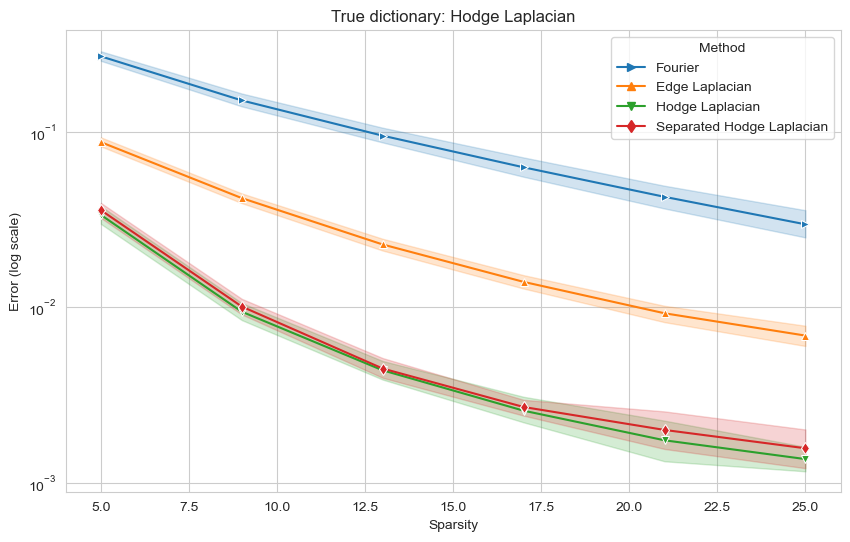

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

TITLE = [dict_types[typ] for typ in dict_types.keys() if typ in dictionary_type][0]

res_df = pd.DataFrame()
dict_types = {"fou": "Fourier", "edge": "Edge Laplacian", "joint": "Hodge Laplacian", "sep": "Separated Hodge Laplacian"}

for d in dict_types.items():
    for sim in range(n_sim):
        tmp_df = pd.DataFrame()   
        tmp_df["Error"] = eval(f'min_error_{d[0]}_test[sim,:]')
        tmp_df["Sparsity"] = K0_coll
        tmp_df["Method"] = d[1]
        res_df = pd.concat([res_df, tmp_df])

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
my_plt = sns.lineplot(data=res_df, x='Sparsity', y='Error', hue='Method',
                       palette=sns.color_palette(),
                       markers=['>', '^', 'v', 'd'], dashes=False, style='Method')
my_plt.set(yscale='log')
my_plt.set_title(f'True dictionary: {TITLE}')
my_plt.set_ylabel('Error (log scale)')
plt.show()

#### Example of saving variables, plot and workspace

In [4]:
import pickle
import os
import dill

save_var = {"min_error_edge_test":min_error_edge_test,
            "min_error_edge_train":min_error_edge_train,
            "min_error_fou_test":min_error_fou_test,
            "min_error_fou_train":min_error_fou_train,
            "min_error_joint_test":min_error_joint_test,
            "min_error_joint_train":min_error_joint_train,
            "min_error_sep_test":min_error_sep_test,
            "min_error_sep_train":min_error_sep_train}

PATH = os.getcwd()
DIR_PATH = f'{PATH}\\results\\{dictionary_type}'
FILENAME_ERR = f'{DIR_PATH}\\error.pkl'
FILENAME_ENV = f'{DIR_PATH}\\ipynb_env.db'
FILENAME_PLT = f'{DIR_PATH}\\plot.png'

if not os.path.exists(DIR_PATH):
    os.makedirs(DIR_PATH)
    
with open(FILENAME_ERR, 'wb') as f: 
    pickle.dump(save_var, f)
f.close()

dill.dump_session(FILENAME_ENV)

fig = my_plt.get_figure()
fig.savefig(FILENAME_PLT)